# Telecommunication Industry Project

The primary objective of this project is to explore a comprehensive Mobile Phone Dataset comprising 50 different mobile phones, each accompanied by its specifications. Using statistical techniques, the goal is to distill key characteristics that contribute to the desirability of these phones. The project aims to identify and extract the most significant features, thereby enabling the identification of the top-performing mobile phones within the dataset.

**Dataset Columns Information**

PID = a unique identifier for the phone model

Blue = whether the phone has bluetooth support or not

Wi_Fi = whether the phone has wifi support or not

Tch_Scr = whether the phone has touch screen support or not

Ext_Mem = whether the phone has external memory support or not

Px_h = number of pixels in the vertical axis of the phone

Px_w = number of pixels in the horizontal axis of the phone

Scr_h = height of the screen of the phone in centimetres (cm)

Scr_w = width of the screen of the phone in centimetres (cm)

Int_Mem = internal memory of the phone measured in megabytes (MB)

Bty_Pwr = maximum energy stored by the phone's battery measured in 
milli-Ampere-hours (mAh)

PC = resolution of the primary camera measued in megapixels (MP)

FC = resolution of the front camera measued in megapixels (MP)

RAM = random access memory available in the phone measured in gigabytes (GB)

Depth = depth of the mobile phone measured in centimetres (cm)

Weight = weight of the mobile phone measured in grams (g)

Price = selling price of the mobile phone in rupees

**Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style = 'white')

C:\Users\asifs\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


**Load Dataset**

In [2]:
df = pd.read_csv(r"C:\Users\asifs\Desktop\DS Projects\Assignments\Telecom Dataset.csv")

### **EDA**

In [3]:
df.head(5)

,PID,Blue,Wi_Fi,Tch_Scr,Ext_Mem,Px_h,Px_w,Scr_h,Scr_w,PC,FC,Int_Mem,Bty_Pwr,RAM,Depth,Weight,Price
0,AAB346A,yes,yes,no,no,780,460,3,1,2,2,8,2800,2,7,320,3297
1,AAC347I,yes,yes,no,no,780,560,2,1,4,2,8,3000,2,7,280,4500
2,BAB657J,no,yes,no,no,840,720,2,1,4,2,8,3300,2,7,400,4898
3,BBD456K,no,yes,yes,no,1280,1120,5,3,6,2,32,3000,2,3,300,6900
4,CCP761U,no,yes,yes,no,1280,1080,4,3,6,2,16,3000,2,3,210,5600


In [4]:
df.shape

(50, 17)

In [5]:
df.index

RangeIndex(start=0, stop=50, step=1)

In [6]:
df.columns

Index(['PID', 'Blue', 'Wi_Fi', 'Tch_Scr', 'Ext_Mem', 'Px_h', 'Px_w', 'Scr_h',
       'Scr_w', 'PC', 'FC', 'Int_Mem', 'Bty_Pwr', 'RAM', 'Depth', 'Weight',
       'Price'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   PID      50 non-null     object
 1   Blue     50 non-null     object
 2   Wi_Fi    50 non-null     object
 3   Tch_Scr  50 non-null     object
 4   Ext_Mem  50 non-null     object
 5   Px_h     50 non-null     int64 
 6   Px_w     50 non-null     int64 
 7   Scr_h    50 non-null     int64 
 8   Scr_w    50 non-null     int64 
 9   PC       50 non-null     int64 
 10  FC       50 non-null     int64 
 11  Int_Mem  50 non-null     int64 
 12  Bty_Pwr  50 non-null     int64 
 13  RAM      50 non-null     int64 
 14  Depth    50 non-null     int64 
 15  Weight   50 non-null     int64 
 16  Price    50 non-null     int64 
dtypes: int64(12), object(5)
memory usage: 6.8+ KB


**Observations**

There are 50 phones in the data set.

There are 17 features in the data set including the "PID" feature which is used as the row index labels.

There are no missing values in the data set.

### **Feature Engineering**

**Create a Feature specifying if the Phone has Bluetooth, WiFi, Touchscreen and External Memory Support**

In [8]:
df[['Blue', 'Wi_Fi', 'Tch_Scr', 'Ext_Mem']].head()

,Blue,Wi_Fi,Tch_Scr,Ext_Mem
0,yes,yes,no,no
1,yes,yes,no,no
2,no,yes,no,no
3,no,yes,yes,no
4,no,yes,yes,no


In [9]:
df['con1'] = (df['Blue'] == 'yes') & (df['Wi_Fi'] == 'yes') & (df['Tch_Scr'] == 'yes') & (df['Ext_Mem'] == 'yes')

**Create a Feature which specifies the Screen Resolution**

In [10]:
df[['Px_h', 'Px_w']].head()

,Px_h,Px_w
0,780,460
1,780,560
2,840,720
3,1280,1120
4,1280,1080


In [11]:
df['Px'] = df['Px_h'] * df['Px_w']

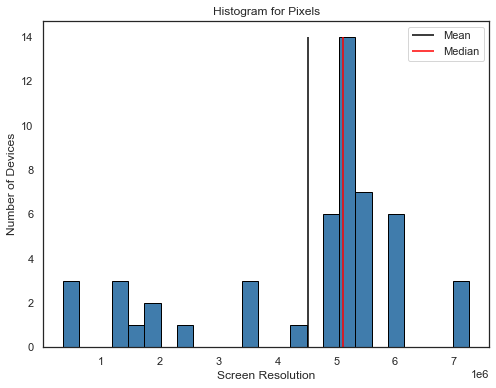

In [12]:
mean = df['Px'].mean()
median = df['Px'].median()

plt.figure(figsize = (8, 6))
sns.histplot(data = df, x = 'Px', color = '#005090', edgecolor = 'black', bins = 25)
plt.title('Histogram for Pixels')
plt.xlabel('Screen Resolution')
plt.ylabel('Number of Devices')
plt.vlines(mean, ymin = 0, ymax = 14, color = 'black', label = 'Mean')
plt.vlines(median, ymin = 0, ymax = 14, color = 'red', label = 'Median')
plt.legend()
plt.show()

**Create a Feature which specifies if the Phone has a High Resolution Display**

In [13]:
df['con2'] = df['Px'] > mean

**Create a Feature which stores the Phone Display Size**

In [14]:
df['Scr_d'] = np.sqrt((df['Scr_h']**2) + (df['Scr_w']**2))

C:\Users\asifs\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


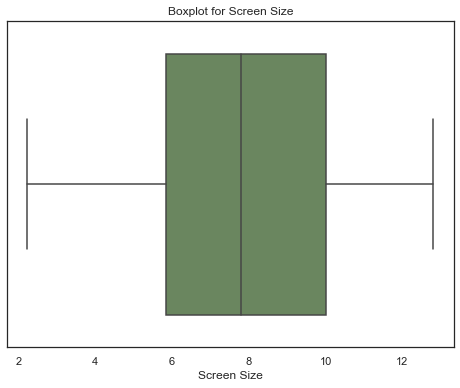

In [15]:
# Box plot for Screen size
plt.figure(figsize = (8, 6))
sns.boxplot(df['Scr_d'], color = '#678D58')
plt.title('Boxplot for Screen Size')
plt.xlabel('Screen Size')
plt.show()

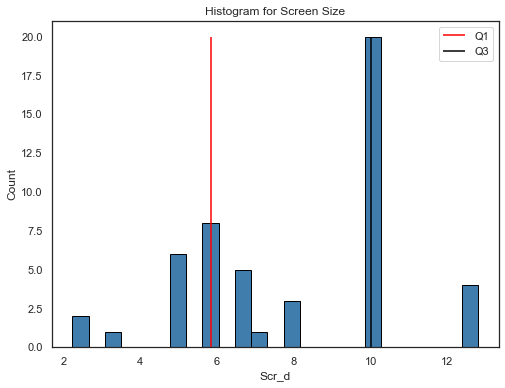

In [16]:
# Histogram of the "Scr_d" feature and its quartiles

Scr_d_list = df['Scr_d'].sort_values(ascending = True)
Q1 = np.percentile(Scr_d_list, 25)
Q3 = np.percentile(Scr_d_list, 75)

plt.figure(figsize = (8, 6))
sns.histplot(data = df, x = 'Scr_d', color = '#005090', edgecolor = 'black', bins = 25)
plt.title('Histogram for Screen Size')
plt.vlines(Q1, color = 'red', label = 'Q1', ymin = 0, ymax = 20)
plt.vlines(Q3, color = 'black', label = 'Q3', ymin = 0, ymax = 20)
plt.legend()
plt.show()

**Create a Feature which specifies if the Phone has a large Screen Size**

In [17]:
df['con3'] = df['Scr_d'] >= Q3 

**Create a Feature which specifies if the Phone has a Large Camera Megapixel Count**

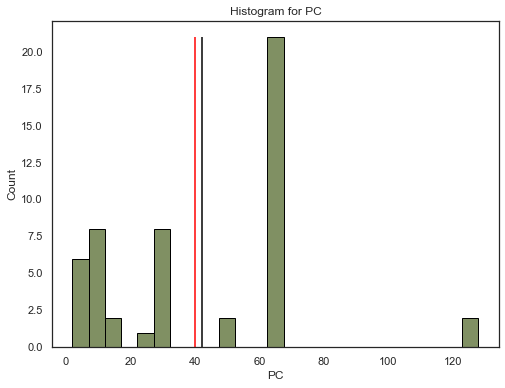

In [52]:
# Histogram of the "PC" feature and its mean and median

mean_pc = df['PC'].mean()
median_pc = df['PC'].median()

plt.figure(figsize = (8, 6))
sns.histplot(df['PC'], color = '#556B2F', edgecolor = 'black', bins = 25)
plt.title('Histogram for PC')
plt.vlines(mean_pc, color = 'black', ymin = 0, ymax = 21)
plt.vlines(median_pc, color = 'red', ymin = 0, ymax = 21)
plt.show()

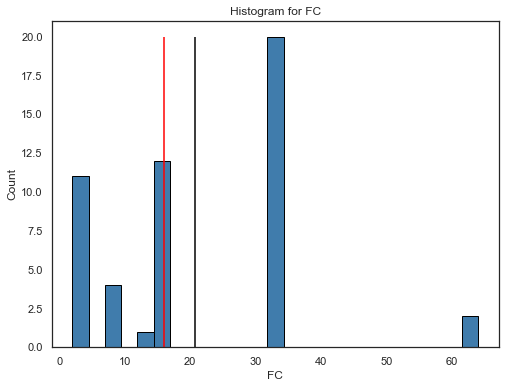

In [19]:
# Histogram of the "FC" feature and its mean and median

mean_fc = df['FC'].mean()
median_fc = df['FC'].median()

plt.figure(figsize = (8, 6))
sns.histplot(df['FC'], color = '#005090', edgecolor = 'black', bins = 25)
plt.title('Histogram for FC')
plt.vlines(mean_fc, color = 'black', ymin = 0, ymax = 20)
plt.vlines(median_fc, color = 'red', ymin = 0, ymax = 20)
plt.show()

In [20]:
df['con4'] = (df['PC'] > mean_pc) & (df['FC'] > mean_fc)

**Create a Feature which specifies if the Phone has a Large Internal Memory, Battery Power and RAM**

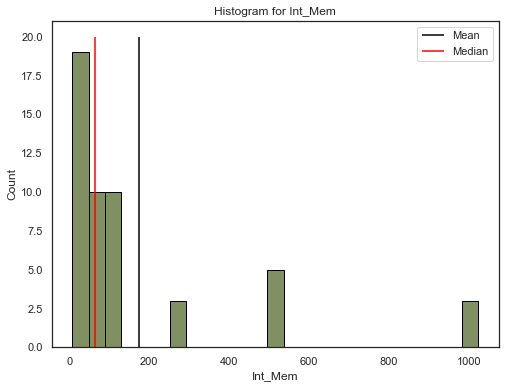

In [51]:
# Histogram of the "Int_Mem" feature and its mean and median

mean_im = df['Int_Mem'].mean()
median_im = df['Int_Mem'].median()

plt.figure(figsize = (8, 6))
sns.histplot(df['Int_Mem'], color = '#556B2F', edgecolor = 'black', bins = 25)
plt.vlines(mean_im, color = 'black', ymin = 0, ymax = 20, label = 'Mean')
plt.vlines(median_im, color = 'red', ymin = 0, ymax = 20, label = 'Median')
plt.title('Histogram for Int_Mem')
plt.legend()
plt.show()

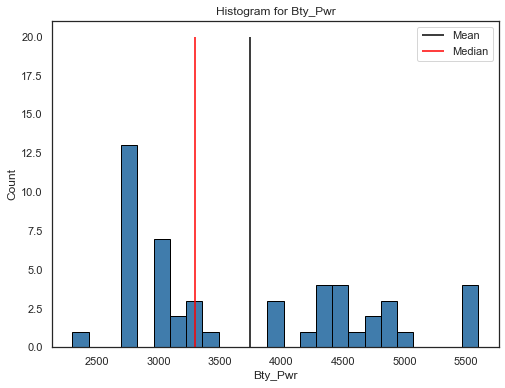

In [22]:
# Create a histogram of the "Bty_Pwr" feature and its mean and median

mean_bp = df['Bty_Pwr'].mean()
median_bp = df['Bty_Pwr'].median()

plt.figure(figsize = (8, 6))
sns.histplot(df['Bty_Pwr'], color = '#005090', edgecolor = 'black', bins = 25)
plt.vlines(mean_bp, color = 'black', ymin = 0, ymax = 20, label = 'Mean')
plt.vlines(median_bp, color = 'red', ymin = 0, ymax = 20, label = 'Median')
plt.title('Histogram for Bty_Pwr')
plt.legend()
plt.show()

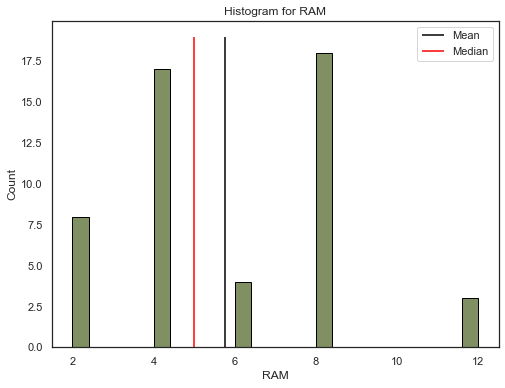

In [50]:
# Create a histogram of the "RAM" feature and its mean and median

mean_r = df['RAM'].mean()
median_r = df['RAM'].median()

plt.figure(figsize = (8, 6))
sns.histplot(df['RAM'], color = '#556B2F', edgecolor = 'black', bins = 25)
plt.vlines(mean_r, color = 'black', ymin = 0, ymax = 19, label = 'Mean')
plt.vlines(median_r, color = 'red', ymin = 0, ymax = 19, label = 'Median')
plt.title('Histogram for RAM')
plt.legend()
plt.show()

In [24]:
df['con5'] = (df['Int_Mem'] > median_im) & (df['Bty_Pwr'] > median_bp) & (df['RAM'] > median_r)

**Create a Feature which specifies if the Phone has a Low Weight and Depth**

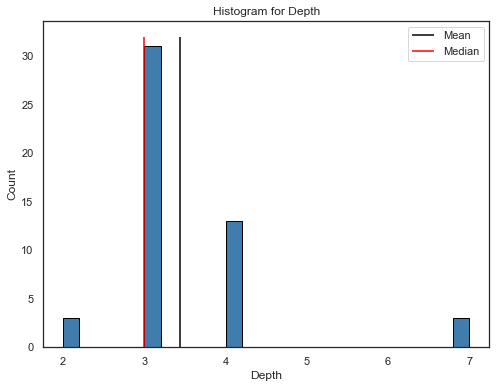

In [25]:
# Create a histogram of the "Depth" feature and its mean and median

mean_d = df['Depth'].mean()
median_d = df['Depth'].median()

plt.figure(figsize = (8, 6))
sns.histplot(df['Depth'], color = '#005090', edgecolor = 'black', bins = 25)
plt.vlines(mean_d, color = 'black', ymin = 0, ymax = 32, label = 'Mean')
plt.vlines(median_d, color = 'red', ymin = 0, ymax = 32, label = 'Median')
plt.title('Histogram for Depth')
plt.legend()
plt.show()

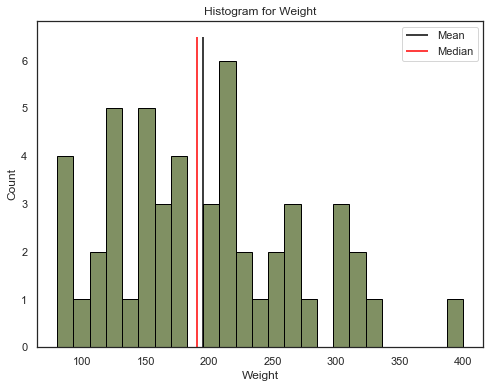

In [26]:
# Create a histogram of the "Weight" feature and its mean and median

mean_w = df['Weight'].mean()
median_w = df['Weight'].median()

plt.figure(figsize = (8, 6))
sns.histplot(df['Weight'], color = '#556B2F', edgecolor = 'black', bins = 25)
plt.vlines(mean_w, color = 'black', ymin = 0, ymax = 6.5, label = 'Mean')
plt.vlines(median_w, color = 'red', ymin = 0, ymax = 6.5, label = 'Median')
plt.title('Histogram for Weight')
plt.legend()
plt.show()

In [27]:
df['con6'] = (df['Depth'] < mean_d) & (df['Weight'] < mean_w)

**Create a Subset for the New Features**

In [42]:
# Store the subset of the dataframe as a new dataframe called "df1"

df1 = df[['PID', 'con1', 'con2', 'con3', 'con4', 'con5', 'con6', 'Price']]

In [43]:
# Dimensions of the new dataframe

df1.shape

(50, 8)

In [45]:
# Sort the new dataframe according to the "Price" in Ascending Order

df1.sort_values(by = 'Price', ascending = True, inplace = True)
df1

C:\Users\asifs\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,PID,con1,con2,con3,con4,con5,con6,Price
0,AAB346A,False,False,False,False,False,False,3297
1,AAC347I,False,False,False,False,False,False,4500
2,BAB657J,False,False,False,False,False,False,4898
5,CCQ674K,False,False,False,False,False,False,4990
4,CCP761U,False,False,False,False,False,False,5600
3,BBD456K,False,False,False,False,False,False,6900
18,PEL111K,False,False,True,False,False,False,11388
6,CTX123L,False,False,False,False,False,True,13400
19,PNWD777L,False,True,False,False,False,False,14350
7,DFR256N,False,True,True,False,False,True,15600


In [49]:
# Phones where all the Conditions are True
df1[(df1['con1'] == True) & (df1['con2'] == True) & (df1['con3'] == True) & (df1['con4'] == True) & (df1['con5'] == True) & (df1['con6'] == True)]

,PID,con1,con2,con3,con4,con5,con6,Price
30,TVF078Y,True,True,True,True,True,True,29999
42,WZB298K,True,True,True,True,True,True,39000
32,TYS938L,True,True,True,True,True,True,46777


**Observations**

Based on all the logical conditions obtained through analysis of the features, we are left with three phones.

The most expensive of these phones is the "TYS938L" model and the least expensive is the "TVF078Y" model.

We could let the children choose from these three phones as per their preferences.

**Create a Series that shows the Deviation of each Numerical Feature**

In [31]:
df_num = df.select_dtypes(include = 'number')

In [32]:
ratios = df_num.std() / df_num.mean()

deviations = pd.Series(ratios)

print(deviations)

Px_h       0.257998
Px_w       0.256226
Scr_h      0.314293
Scr_w      0.407624
PC         0.715716
FC         0.712184
Int_Mem    1.506514
Bty_Pwr    0.256368
RAM        0.479075
Depth      0.306072
Weight     0.388121
Price      0.740868
Px         0.398680
Scr_d      0.340469
dtype: float64


In [33]:
deviations.sort_values(ascending = False)

Int_Mem    1.506514
Price      0.740868
PC         0.715716
FC         0.712184
RAM        0.479075
Scr_w      0.407624
Px         0.398680
Weight     0.388121
Scr_d      0.340469
Scr_h      0.314293
Depth      0.306072
Px_h       0.257998
Bty_Pwr    0.256368
Px_w       0.256226
dtype: float64

**Observations**

The ratio of the standard deviation to the mean of a feature normalises it in a way.

This allows for comparison between multiple features.

The most variable feature in the original data set is the internal memory of the phones.

The least variable feature in the original data set is the number of screen pixels in the horizontal axis.

Although most features don't seem so variable, the prices of the phones are quite variable.